<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab3_Coupled_Oscillator/blob/main/Lab2_Coupled_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3. Coupled oscillator

Evgeny Kolonsky, November 2023

In [5]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import requests

## Direct Measurements



In [10]:
# Springs
l = 97.95e-3 # m, spring strain
g = 9.8 # m/s^2

# left spring (attached to cart A)
weightl = 44.8e-3 #
kl = weightl * g /l
ml = 17e-3 # kg

# right spring (attached to cart B)
weightr = 44.8e-3
kr = weightr * g /l
mr = 17e-3 # kg

# middle spring (between carts A and B)
weightc = 68.6e-3
kc = weightc * g /l
mc = 11.7e-3 #

# Carts
m1 = 208.9e-3 #kg
m2 = 208.9e-3
counts = 236
length = 123e-3

# Expected natural frequencies
$$
[ m ] \ddot x + [ k ] x = 0
$$
$$
[m] =  \begin{bmatrix} m_1 & 0 \\ 0 & m_2 \end{bmatrix} ,
$$
$$
[k] = \begin{bmatrix} k_l +k_c & -k_c \\ -k_c & k_c +k_r \end{bmatrix},
$$

$$
det A = \begin{vmatrix}
        \frac{k_l +k_c}{m_1} - \omega^2 & -\frac{k_c}{m_1} \\
        -\frac{k_c}{m_2} & \frac{k_c +k_r}{m_2} - \omega^2
        \end{vmatrix}
        = 0
$$


In [30]:
from numpy import linalg as LA


a = np.array([[(kl+kc)/m1, -kc/m1],
              [-kc/m2, (kc + kr)/m2]])
eigenvalues, eigenvectors = LA.eig(a)
freqs = np.sqrt(eigenvalues)/2/np.pi # Herz
freqs

array([1.48592683, 0.73722616])

In [36]:
def get_frequency(t, x, show=False):
  # get maximum  in Fast Fourie Transform spectrum
  X = np.fft.fft(x, n=15000)
  sr = 1/ np.diff(t).mean()
  N = len(X)
  T = N/sr
  freqs = np.arange(N)/T
  f0 = freqs[np.argmax(np.abs(X))]
  if show:
      plt.stem(freqs, np.abs(X), 'b', \
      markerfmt=" ", basefmt="-b")
      plt.xlabel('Freq (Hz)')
      plt.ylabel('FFT Amplitude |X(freq)|')
      plt.xlim(0.1, 2.2)
      plt.axvline(f0, c='r')
      plt.annotate(fr'$f$={f0:.2f}Hz',xy=(f0, 10))
  return f0

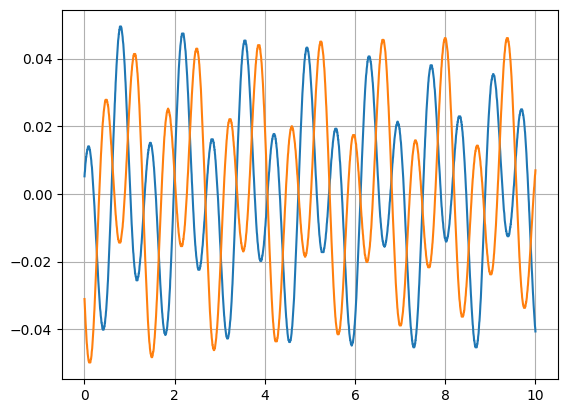

In [37]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab3_Coupled_Oscillator/main/c_4.txt'
data = np.loadtxt(url)
_, t, a, b = data.T
x1 = a/counts * length
x2 = b/counts * length
x1 -= x1.mean()
x2 -= x2.mean()
plt.plot(t, x1)
plt.plot(t,x2)
plt.grid()

1.4533333333333334

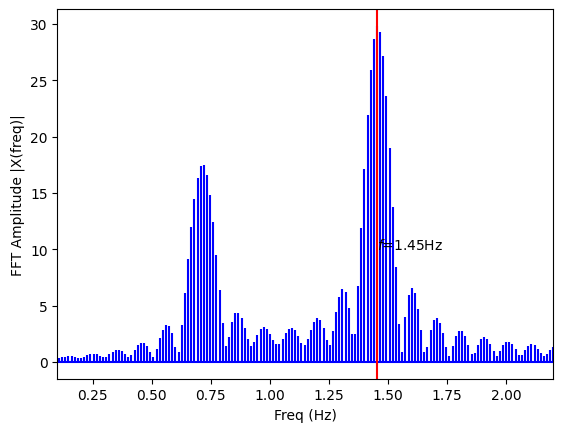

In [39]:
get_frequency(t,x1, show=True)

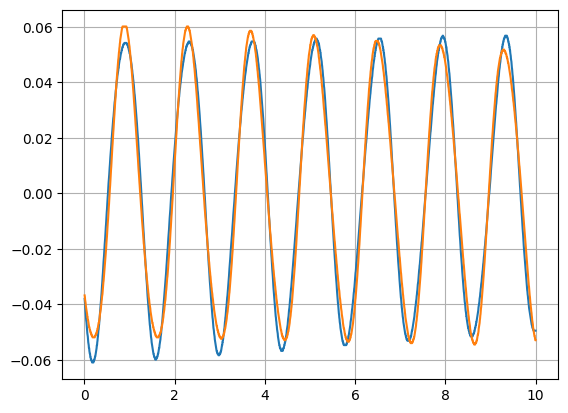

In [40]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab3_Coupled_Oscillator/main/c_1.txt'
data = np.loadtxt(url)
_, t, a, b = data.T
x1 = a/counts * length
x2 = b/counts * length
x1 -= x1.mean()
x2 -= x2.mean()
plt.plot(t, x1)
plt.plot(t,x2)
plt.grid()

0.7066666666666667

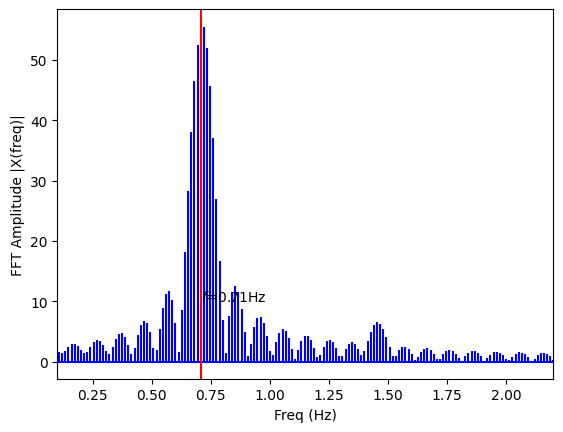

In [41]:
get_frequency(t,x1, show=True)

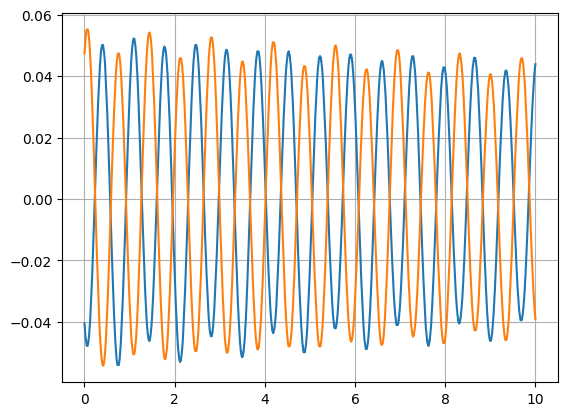

In [42]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab3_Coupled_Oscillator/main/c_2.txt'
data = np.loadtxt(url)
_, t, a, b = data.T
x1 = a/counts * length
x2 = b/counts * length
x1 -= x1.mean()
x2 -= x2.mean()
plt.plot(t, x1)
plt.plot(t,x2)
plt.grid()

198.54666666666665

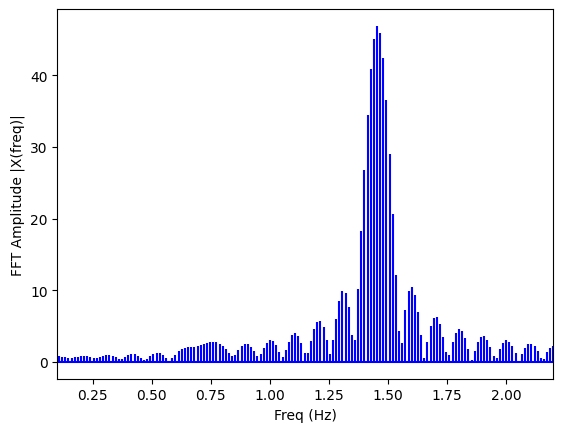

In [43]:
get_frequency(t,x1, show=True)

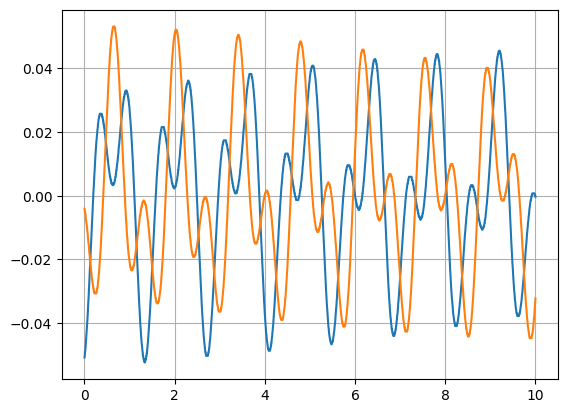

In [44]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab3_Coupled_Oscillator/main/c_3.txt'
data = np.loadtxt(url)
_, t, a, b = data.T
x1 = a/counts * length
x2 = b/counts * length
x1 -= x1.mean()
x2 -= x2.mean()
plt.plot(t, x1)
plt.plot(t,x2)
plt.grid()

0.7066666666666667

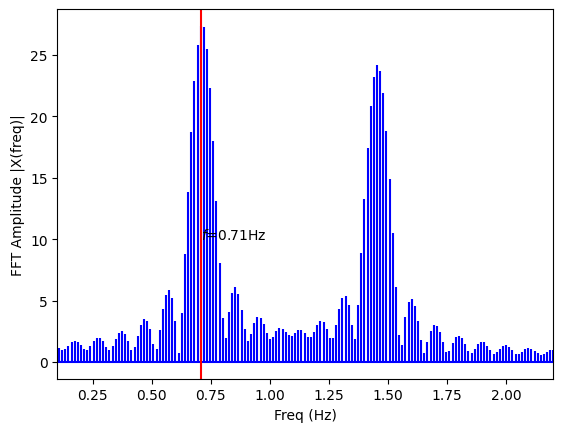

In [46]:
get_frequency(t,x2, show=True)